In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

print("# File names")
for f in os.listdir("../"):
    if 'zip' not in f:
        print(f.ljust(50) + str(round(os.path.getsize('../' + f) / 1000000, 2)) + 'MB')

# File names
.ipynb_checkpoints                                0.0MB
Iris flower-Hello World to ML                     0.0MB
Quora-Question-Pairs                              0.0MB
sample_submission.csv                             22.35MB
test.csv                                          314.02MB
Titanic                                           0.0MB
train.csv                                         63.4MB


# Training Test

In [70]:
df_train = pd.read_csv('../train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [71]:
df_train.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [72]:
import string

# replace punctuations
#'''
for q in ['question1', 'question2']:
    df_train[q] = df_train[q].str.lower()
    for punct in string.punctuation:
        df_train[q] = df_train[q].str.replace(punct, " ")
#'''

df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0


In [73]:
print('The total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(np.unique(qids))))
print('Number of questions that appear multiple time: {}'.format(np.sum(qids.value_counts() > 1)))

The total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple time: 111780


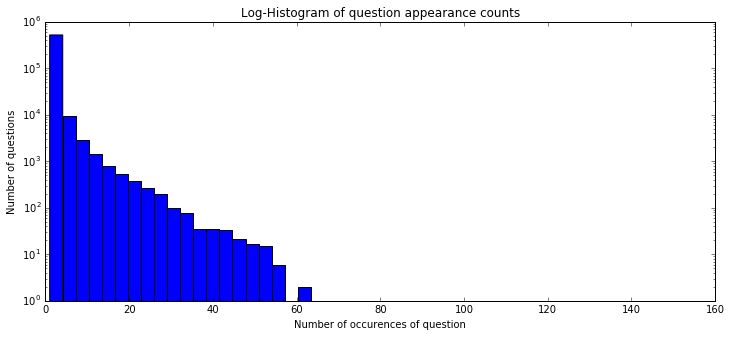

In [74]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

# Test Set

In [75]:
df_test = pd.read_csv('../test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [76]:
print('The total number of question pairs for testing: {}'.format(len(df_test)))

# replace punctuations
#'''
for q in ['question1', 'question2']:
    df_test[q] = df_test[q].str.lower()
    for punct in string.punctuation:
        df_test[q] = df_test[q].str.replace(punct, " ")
#'''


The total number of question pairs for testing: 2345796


# Text Analysis

mean-train 59.82 std-train 31.96 mean-test 60.07 std-test 31.62 max-train 1169.00 max-test 1176.00


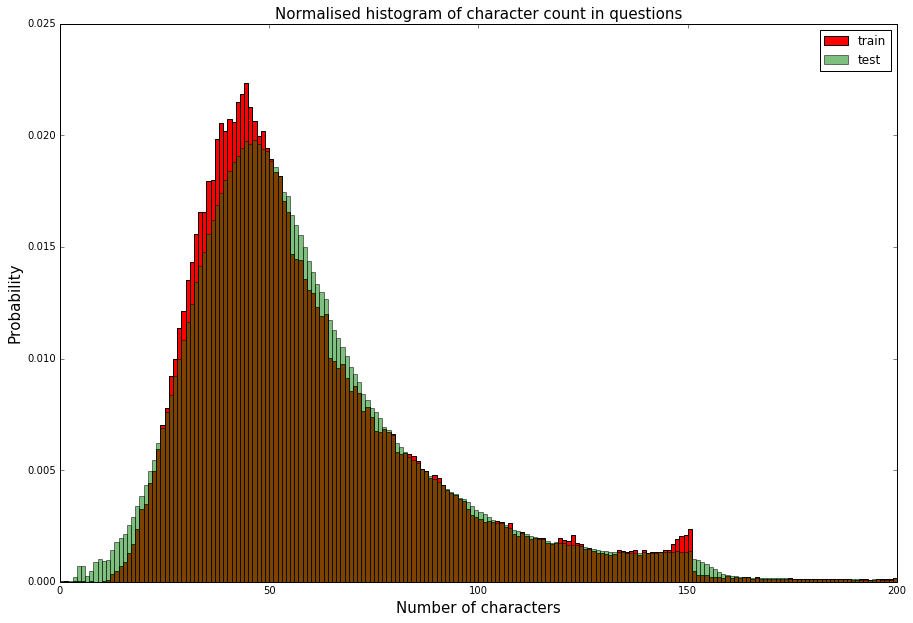

In [77]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

mean-train 12.69 std-train 6.71 mean-test 12.71 std-test 6.68 max-train 271.00 max-test 274.00


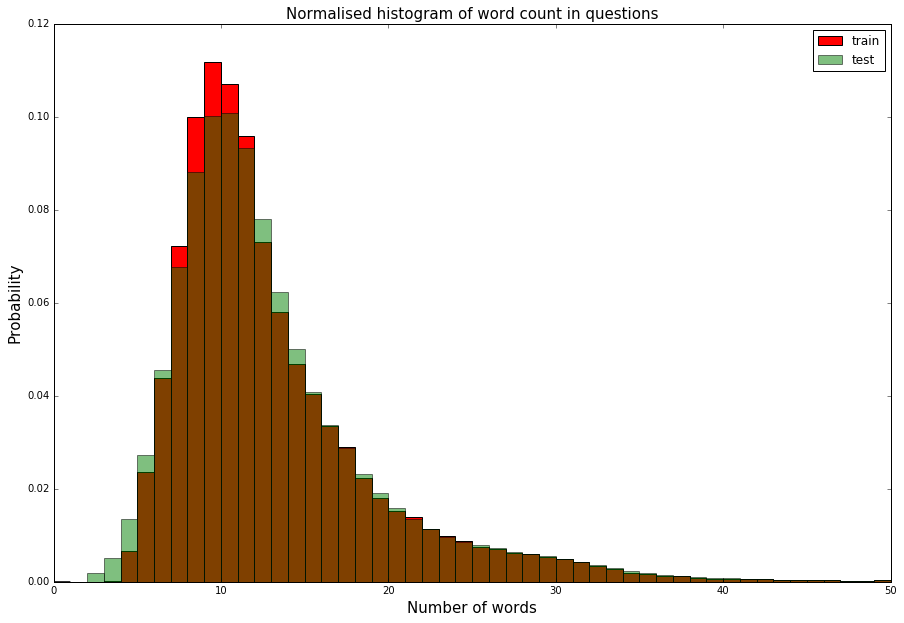

In [78]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [79]:
train_qs.head()

0    what is the step by step guide to invest in sh...
1    what is the story of kohinoor  koh i noor  dia...
2    how can i increase the speed of my internet co...
3    why am i mentally very lonely  how can i solve...
4    which one dissolve in water quikly sugar  salt...
dtype: object

(-0.5, 1439.5, 1079.5, -0.5)

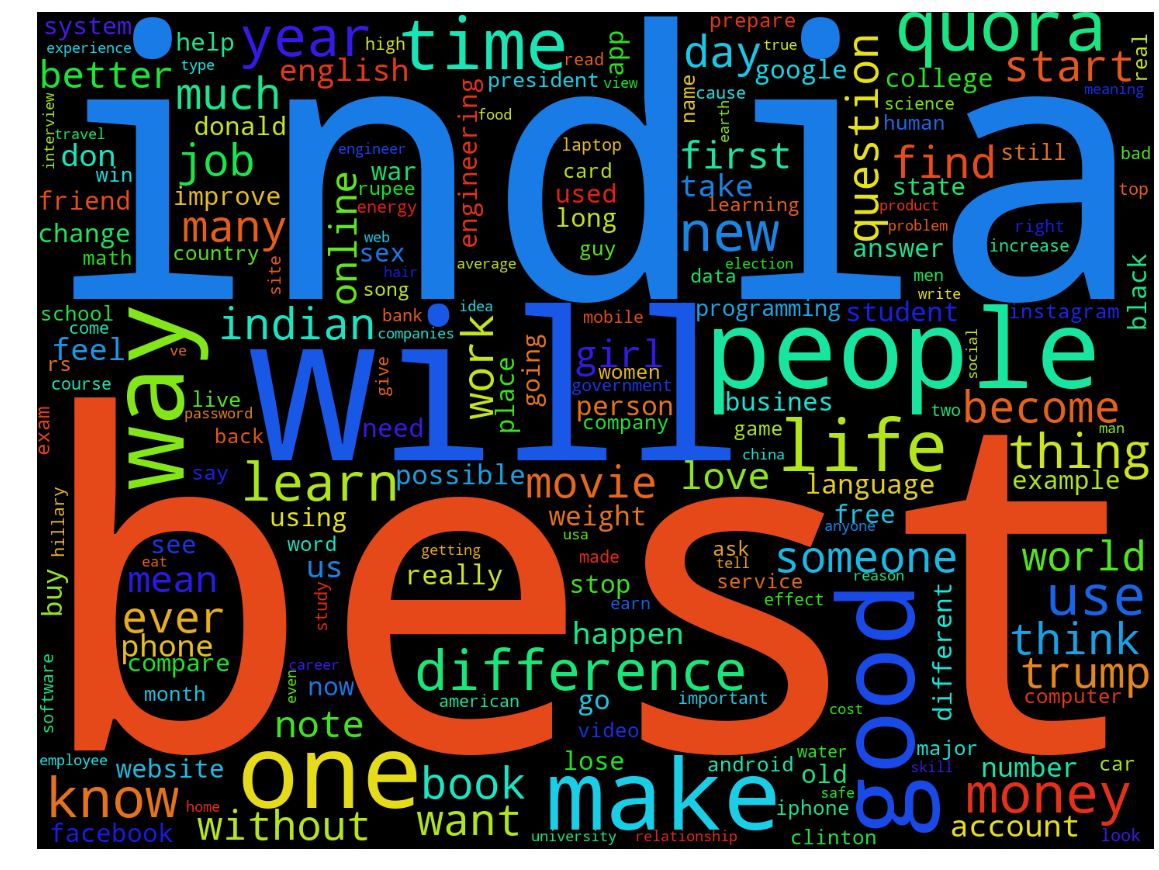

In [80]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# Semantic analsis

In [81]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capital first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 0.00%
Questions with [math] tags: 0.00%
Questions with full stops: 0.00%
Questions with capital first letters: 0.00%
Questions with capital letters: 0.00%
Questions with numbers: 11.83%


# Initial feature analysis

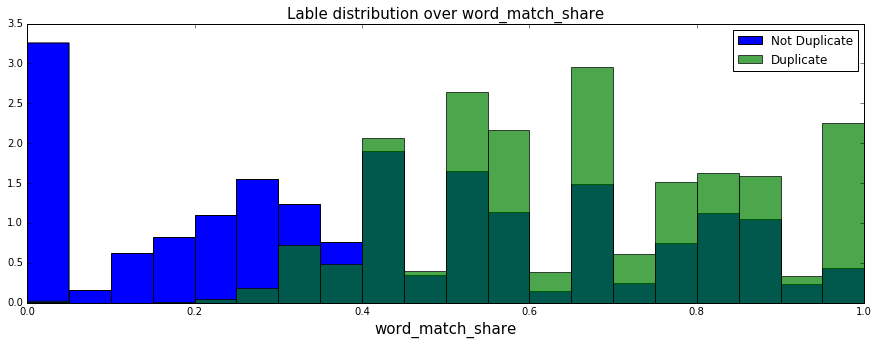

In [82]:
from nltk.corpus import stopwords
import string

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize = (15, 5))
train_word_match = df_train.apply(word_match_share, axis = 1, raw = True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins = 20, normed = True, label = 'Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins = 20, normed = True, alpha = 0.7, label = 'Duplicate')
plt.legend()
plt.title('Lable distribution over word_match_share', fontsize = 15)
plt.xlabel('word_match_share', fontsize = 15)

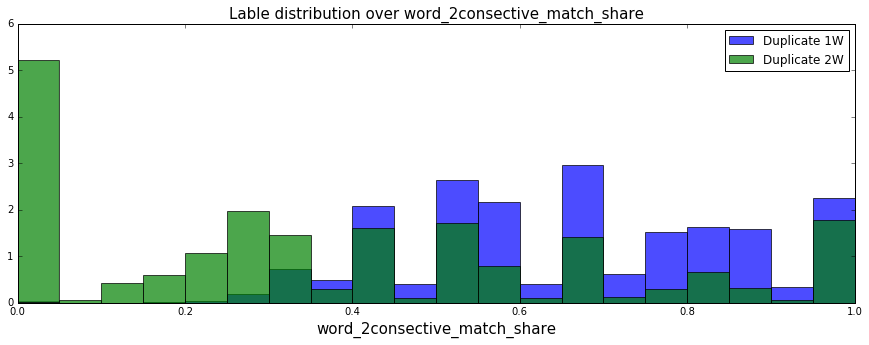

In [83]:
def word_2consective_match_share(row):
    q1words = []
    q2words = []
    q1words2c = []
    q2words2c = []

    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words.append(word)
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words.append(word)
    if len(q1words) == 0 or len(q2words) == 0 or len(q1words) == 1 or len(q2words) == 1:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    for i in range(len(q1words)-1):
        q1words2c.append(q1words[i]+q1words[i+1])
    for j in range(len(q2words)-1):
        q2words2c.append(q2words[j]+q2words[j+1])

    shared_words_in_q1 = [w for w in q1words2c if w in q2words2c]
    shared_words_in_q2 = [w for w in q2words2c if w in q1words2c]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words2c) + len(q2words2c))
    return R

plt.figure(figsize = (15, 5))
train_word_2consective_match = df_train.apply(word_2consective_match_share, axis = 1, raw = True)
# plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins = 20, normed = True, label = 'Not Duplicate 1W')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins = 20, normed = True, alpha = 0.7, label = 'Duplicate 1W')
# plt.hist(train_word_2consective_match[df_train['is_duplicate'] == 0], bins = 20, normed = True, label = 'Not Duplicate 2W')
plt.hist(train_word_2consective_match[df_train['is_duplicate'] == 1], bins = 20, normed = True, alpha = 0.7, label = 'Duplicate 2W')
plt.legend()
plt.title('Lable distribution over word_2consective_match_share', fontsize = 15)
plt.xlabel('word_2consective_match_share', fontsize = 15)

# TF-IDF (term-frequency-inverse-document-frequency)

In [84]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)
    
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

# counts.most_common(10)

print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
print(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5797464109278056e-06), ('what', 2.991987457588578e-06), ('is', 3.5725641364576598e-06), ('i', 4.292508713792689e-06), ('how', 4.331554508281932e-06), ('a', 4.500328523982251e-06), ('to', 4.63376998892529e-06), ('in', 4.824648162532748e-06), ('do', 5.846107077297228e-06), ('of', 5.8868199987049e-06)]

Least common words and weights: 
[('ऐहंकार', 9.998000399920016e-05), ('hpeople', 9.998000399920016e-05), ('monosodium', 9.998000399920016e-05), ('istream', 9.998000399920016e-05), ('pharmacogenetics', 9.998000399920016e-05), ('omasum', 9.998000399920016e-05), ('“product', 9.998000399920016e-05), ('forevermore', 9.998000399920016e-05), ('japanophile', 9.998000399920016e-05), ('10v', 9.998000399920016e-05)]


In [85]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

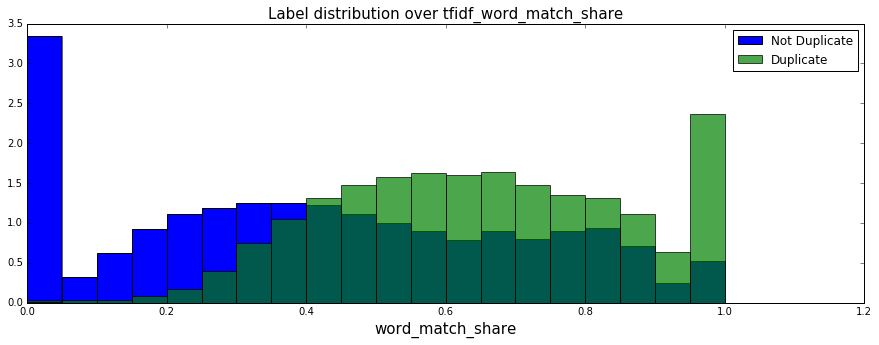

In [86]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [87]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))

Original AUC: 0.745683141157
   TFIDF AUC: 0.735029562876


# XGBoost

In [88]:
# First we create our training and testing data

x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

In [89]:
# Cross validation
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

In [90]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4
params['scale_pos_weight'] = 0.36

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.687673	valid-logloss:0.687712
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.645876	valid-logloss:0.646249
[20]	train-logloss:0.620535	valid-logloss:0.621163
[30]	train-logloss:0.605126	valid-logloss:0.605907
[40]	train-logloss:0.596054	valid-logloss:0.596992
[50]	train-logloss:0.591046	valid-logloss:0.592085
[60]	train-logloss:0.588679	valid-logloss:0.589794
[70]	train-logloss:0.58795	valid-logloss:0.589143
[80]	train-logloss:0.588223	valid-logloss:0.589488
[90]	train-logloss:0.589127	valid-logloss:0.590461
[100]	train-logloss:0.590334	valid-logloss:0.591728
[110]	train-logloss:0.591668	valid-logloss:0.593112
[120]	train-logloss:0.593022	valid-logloss:0.59452
Stopping. Best iteration:
[71]	train-logloss:0.58793	valid-logloss:0.589135



In [91]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('simple_xgb.csv', index=False)